# LOADING THE DATASET

In [1]:
# Importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
# Loading the datasets
df = pd.ExcelFile('./Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx')
df1 = df.parse('Existing employees')
df2 = df.parse('Employees who have left')

In [3]:
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [4]:
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


In [5]:
# Checking the shape of the 2 datasets.
print(df1.shape)
print(df2.shape)

(11428, 11)
(3571, 11)


In [6]:
#combining the two datasets
df= pd.concat([df1, df2])   
df.head() 

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [7]:
# Viewing shape of the combined data.
df.shape

(14999, 11)

- The dataset has 14,999 rows and 11 columns

In [8]:
# Checking vvariables and their data types.
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
Left                     14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


- Some variables should be categorical including:
- Work_accident 
- promotion_last_5years 



In [9]:
# Converting EMP ID to string.
df['Emp ID'] = df['Emp ID'].astype('str')

In [10]:
# Conerting variables to categorical.
a = ['Work_accident', 'promotion_last_5years', 'Left']
for i in a: 
    df[i] = pd.Categorical(df[i])
    
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
Emp ID                   14999 non-null object
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null category
promotion_last_5years    14999 non-null category
dept                     14999 non-null object
salary                   14999 non-null object
Left                     14999 non-null category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [11]:
# Checking for duplicated values.
df.duplicated().sum()  

0

# UNIVARIATE ANALYSIS

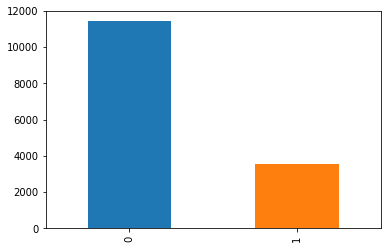

In [12]:
df['Left'].value_counts().plot('bar')  

- We have an imbalanced dataset

In [13]:
df.groupby('Left').mean().unstack() 

                      Left
satisfaction_level    0         0.666810
                      1         0.440098
last_evaluation       0         0.715473
                      1         0.718113
number_project        0         3.786664
                      1         3.855503
average_montly_hours  0       199.060203
                      1       207.419210
time_spend_company    0         3.380032
                      1         3.876505
dtype: float64

# BIVARIATE ANALYSIS

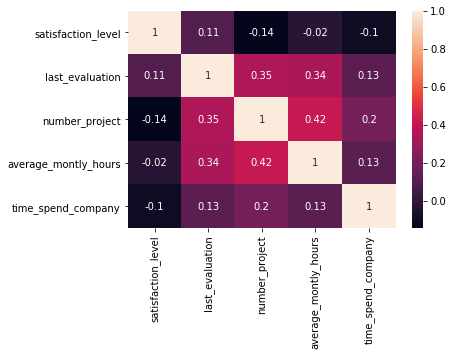

In [14]:
# Numerical variables
w = df.corr()
sns.heatmap(w, annot = True) 
plt.savefig("heatmap employees")

In [15]:
q = df.groupby(['dept', 'Left'])['Left'].count()
# .plot(kind='bar')
# plt.ylabel('Count') 
z = q.unstack() 


# MULTIVARIATE ANALYSIS

# MODELLING

## Baseline model : Logistics regression

In [16]:
# Separting data into features and labels.
# Features.
X = df.iloc[:, 1:10]

# Labels
y = df.iloc[:, 10]
 

In [17]:
# Columns dept and salary need to be one hot encoded.
a = pd.get_dummies(X["dept"])
b = pd.get_dummies(X["salary"])

# To avoid dummy trap we drop one column in each encoding.
a.drop(['hr'], axis = 1, inplace = True)
b.drop(['medium'], axis = 1, inplace = True)

# Dropping the unencoded ariables in X
X.drop(['dept', 'salary'], axis = 1, inplace = True)

In [18]:
# Combing the datasets we have.
x = pd.concat([X,a,b], axis=1)
X = x.values

In [19]:
# Converrting y to an array
from collections import Counter
y = np.array(y)
Counter(y) 

Counter({0: 11428, 1: 3571})

- The dataset is imbalanced and we have to deal with that

## Implementing oversampling

In [20]:
# Viewing the original shape of data
print(X.shape)
print(y.shape)

(14999, 18)
(14999,)


In [21]:
# implementing oversampling
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0) 
X_new, y_new = smk.fit_sample(X,y)

In [22]:
# Shape of data after oversampling
print(X_new.shape)
print(y_new.shape)

(22804, 18)
(22804,)


In [23]:
# Counting the unique values in an y after balancing out the vallues.
from collections import Counter
format(Counter(y_new)) 

'Counter({0: 11402, 1: 11402})'

- The data is now balanced

In [24]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=0) 

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Fitting Logistic Regression to Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
# Predicting Test set results
y_pred = classifier.predict(X_test)
w = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
w.head() 

,y_test,y_pred
0,1,0
1,1,1
2,1,1
3,1,1
4,0,0


## Model evaluation

In [28]:
# logistics model Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
cm

array([[1721,  563],
       [ 434, 1843]], dtype=int64)

In [29]:
# Obtaining logistics model Accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.7814075860556895

In [30]:
# Obtaining coefficients of the logistics model.
# Putting the colums names of independent variables and the coefficients in a list
test_features = list (x.columns)
coefs = classifier.coef_.tolist()[0]

# Creating a dataframe of features and their coefficients
coefficients = pd.DataFrame({"feature":test_features, "coefficient":coefs}) 
coefficients

,feature,coefficient
0,satisfaction_level,-1.221762
1,last_evaluation,0.267985
2,number_project,-0.645148
3,average_montly_hours,0.230317
4,time_spend_company,0.652544
5,Work_accident,-0.541941
6,promotion_last_5years,-0.244163
7,IT,-0.181320
8,RandD,-0.206295
9,accounting,-0.086857


## Model improvement - Random forest 

In [31]:
# Fitting Random Forest Classification to Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
# Predicting results
y_pred = classifier_rf.predict(X_test)
p = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
p.head() 

,y_test,y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0


## Model evaluation 

In [33]:
# Getting the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
cm

array([[2276,    8],
       [  21, 2256]], dtype=int64)

In [34]:
# Getting model Accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9936417452313089

In [35]:
# Get numerical feature importances
importances = list(classifier_rf.feature_importances_)
test_features = list (x.columns) 

# Creating a dataframe of features and their importance
feature_importances = pd.DataFrame({"feature":test_features, "feature_importance":importances})

# Sorting the data frame in descending order. This puts the most important features at the top
feature_importances = feature_importances. sort_values(by ='feature_importance' , ascending=False) 
feature_importances 

,feature,feature_importance
0,satisfaction_level,0.258099
4,time_spend_company,0.236633
2,number_project,0.164047
3,average_montly_hours,0.145227
1,last_evaluation,0.118220
17,low,0.017566
5,Work_accident,0.016215
16,high,0.008213
15,technical,0.007667
13,sales,0.006558
